In [59]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [60]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [61]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [62]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [63]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [65]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [66]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3644 - val_loss: 0.2721
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2656 - val_loss: 0.2555
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2447 - val_loss: 0.2319
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2234 - val_loss: 0.2131
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2081 - val_loss: 0.2007
Epoch 6/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1973 - val_loss: 0.1914
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1888 - val_loss: 0.1837
Epoch 8/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1818 - val_loss: 0.1776
Epoch 9/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1760 - val_loss: 0.1721
Epoch

In [76]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs_test = encoder.predict(x_test)
encoded_imgs_train = encoder.predict(x_train)

decoded_imgs_test = decoder.predict(encoded_imgs)

In [77]:
encoded_imgs.shape

(10000, 32)

In [78]:
decoded_imgs.shape

(10000, 784)

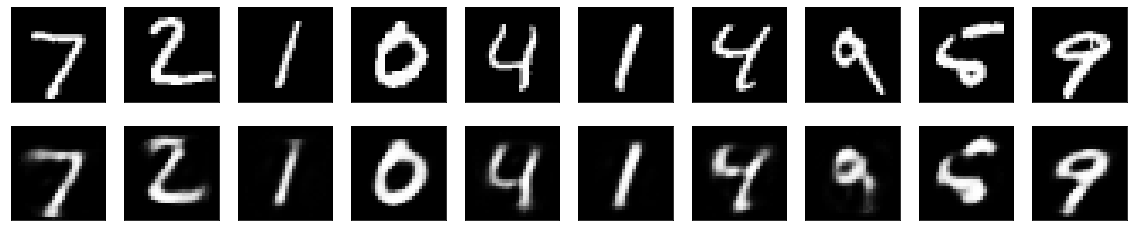

In [79]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [80]:
encoded_imgs_train.shape

(60000, 32)

In [74]:
from sklearn.neighbors import NearestNeighbors

In [81]:
# Fit kNN model on training images
knn = NearestNeighbors(n_neighbors=5, metric="cosine")
knn.fit(encoded_imgs_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [168]:
# Predict KNN for the first test image
distances, indices = knn.kneighbors(np.array(encoded_imgs_test[0]).reshape(1, 32))

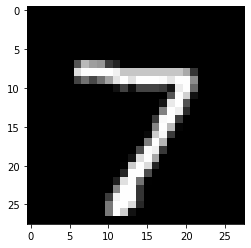

In [170]:
# First test image
plt.imshow(x_test[0].reshape(28,28))

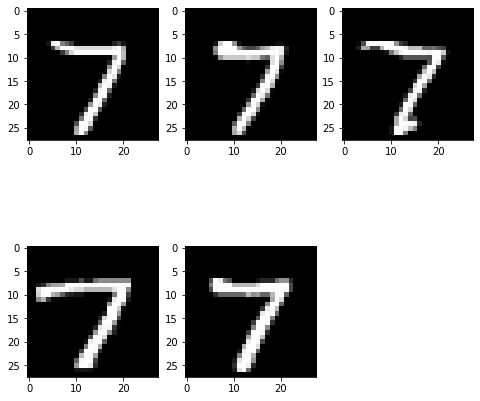

In [171]:
# n_neighbors of the test image
fig= plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i, idx in zip(range(1, columns*rows +1), np.nditer(indices)):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[idx].reshape(28, 28))
plt.show()